In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import mapfunction as mapf
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
wh_ef = pd.read_csv('wh_ef_final.csv')

In [3]:
wh_ef.head()

,Country,Alpha-3 code,Region,Happiness Score,Economic Freedom Score
0,Afghanistan,AFG,Southern Asia,3.203,51.5
1,Albania,ALB,Central and Eastern Europe,4.719,66.5
2,Algeria,DZA,Middle East and Northern Africa,5.211,46.2
3,Argentina,ARG,Latin America and Caribbean,6.086,52.2
4,Armenia,ARM,Central and Eastern Europe,4.559,67.7


# <span style="color:red">Observation 1: Findland has the highest happiness score, while South Sudan has the lowest </span>  

# <span style="color:red">Observation 2: Hong Kong has the highest economic freedom score, while Venezuela has the lowest</span>

# <span style="color:red">Observation 3: There is a much broader range of economic freedom scores than there are of happiness scores</span>

#### Question: What is the min, max and range of Happiness Scores?

In [4]:
print('Min Happiness Score:',round(wh_ef['Happiness Score'].min(), 3))
print('Min Happiness Country:')
print(wh_ef[['Country', 'Region']].loc[wh_ef['Happiness Score'] == wh_ef['Happiness Score'].min()])
print('Max Happiness Score:',round(wh_ef['Happiness Score'].max(), 3))
print('Max Happiness Country:')
print(wh_ef[['Country', 'Region']].loc[wh_ef['Happiness Score'] == wh_ef['Happiness Score'].max()])
print('Happiness Score range:', round((wh_ef['Happiness Score'].max()- wh_ef['Happiness Score'].min()),3))

Min Happiness Score: 2.853
Min Happiness Country:
         Country              Region
124  South Sudan  Sub-Saharan Africa
Max Happiness Score: 7.769
Max Happiness Country:
    Country          Region
44  Finland  Western Europe
Happiness Score range: 4.916


Text(0.5, 1.0, 'Bottom 10 Happiness Scores')

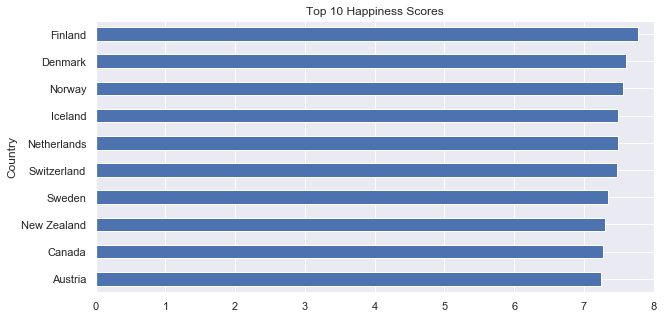

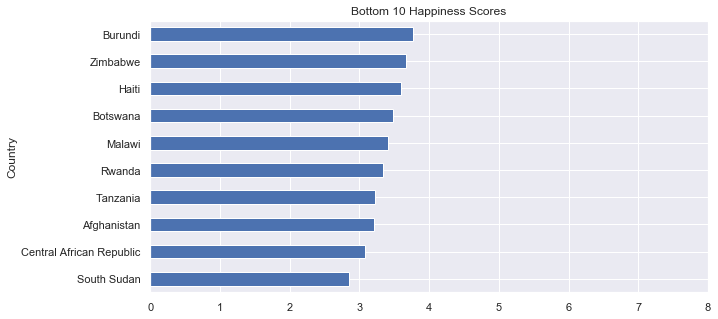

In [5]:
ax = wh_ef[['Country','Happiness Score']].sort_values('Happiness Score').tail(10).plot(kind='barh',x='Country',y='Happiness Score',xlim=(0,8), figsize=(10,5))
ax.get_legend().remove()
ax.set_title('Top 10 Happiness Scores')

ax = wh_ef[['Country','Happiness Score']].sort_values('Happiness Score').head(10).plot(kind='barh',x='Country',y='Happiness Score',xlim=(0,8), figsize=(10,5))
ax.get_legend().remove()
ax.set_title('Bottom 10 Happiness Scores')

#### Question: What is the min, max and range of Population Density Scores?

In [6]:
print('Min Economic Freedom Score:',round(wh_ef['Economic Freedom Score'].min(), 3))
print('Min Economic Freedom Country:')
print(wh_ef[['Country', 'Region']].loc[wh_ef['Economic Freedom Score'] == wh_ef['Economic Freedom Score'].min()])
print('Max Economic Freedom Score:',round(wh_ef['Economic Freedom Score'].max(), 3))
print('Max Economic Freedom Country:')
print(wh_ef[['Country', 'Region']].loc[wh_ef['Economic Freedom Score'] == wh_ef['Economic Freedom Score'].max()])
print('Economic Freedom Score range:', round((wh_ef['Economic Freedom Score'].max()- wh_ef['Economic Freedom Score'].min()),3))

Min Economic Freedom Score: 25.9
Min Economic Freedom Country:
       Country                       Region
145  Venezuela  Latin America and Caribbean
Max Economic Freedom Score: 90.2
Max Economic Freedom Country:
      Country        Region
56  Hong Kong  Eastern Asia
Economic Freedom Score range: 64.3


Text(0.5, 1.0, 'Bottom 10 Economic Freedom Scores')

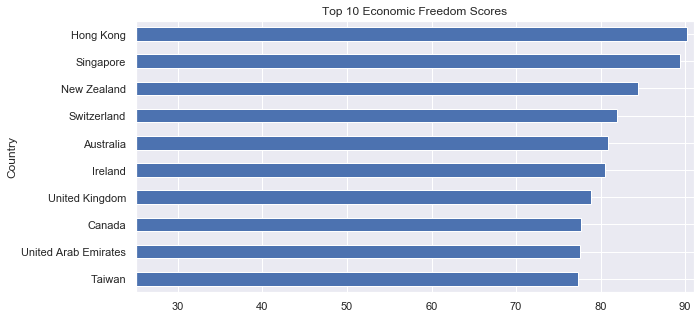

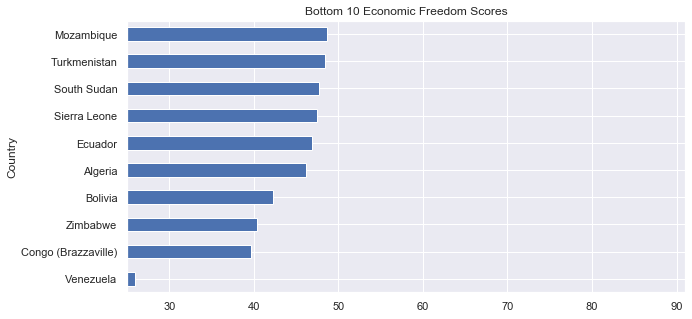

In [7]:
ax = wh_ef[['Country','Economic Freedom Score']].sort_values('Economic Freedom Score').tail(10).plot(kind='barh',x='Country',y='Economic Freedom Score',xlim=(25,91), figsize=(10,5))
ax.get_legend().remove()
ax.set_title('Top 10 Economic Freedom Scores')

ax = wh_ef[['Country','Economic Freedom Score']].sort_values('Economic Freedom Score').head(10).plot(kind='barh',x='Country',y='Economic Freedom Score',xlim=(25,91), figsize=(10,5))
ax.get_legend().remove()
ax.set_title('Bottom 10 Economic Freedom Scores')

# <span style="color:red">Observation: Both World Happiness and Economic Freedom have fairly normal distributions</span>

### Question: What's the distribution of each category

In [8]:
hist_happiness = wh_ef[['Happiness Score']]
hist_ef = wh_ef[['Economic Freedom Score']]

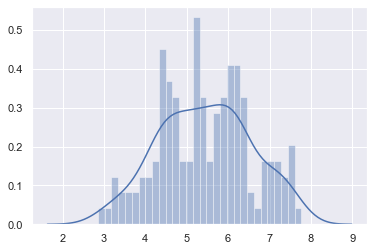

In [9]:
sns.distplot(hist_happiness, bins=30)

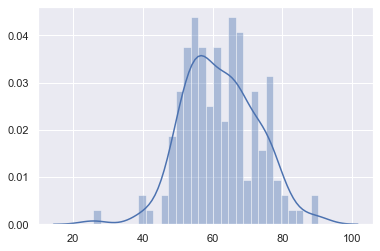

In [10]:
sns.distplot(hist_ef, bins=30)

# <span style="color:red">Observation 1: The top 3 regions for average happiness scoree and average economic freedom are the same</span>

# <span style="color:red">Observation 2: The bottom 2 regions for average happiness scoree and average economic freedom are the same</span>

#### Question: What are the average scores by region?

In [11]:
def score_by_region(score):
    print(wh_ef[['Region',score]].groupby('Region').mean().sort_values(score, ascending=False))

def graph_by_region(score):
    wh_ef[['Region',score]].groupby('Region').mean().sort_values(score).plot(kind='barh', title=score)
    plt.legend().remove()

                                 Happiness Score
Region                                          
Australia and New Zealand               7.267500
North America                           7.085000
Western Europe                          6.898400
Latin America and Caribbean             5.954429
Eastern Asia                            5.688833
Middle East and Northern Africa         5.571643
Central and Eastern Europe              5.561517
Southeastern Asia                       5.273667
Southern Asia                           4.526857
Sub-Saharan Africa                      4.290615


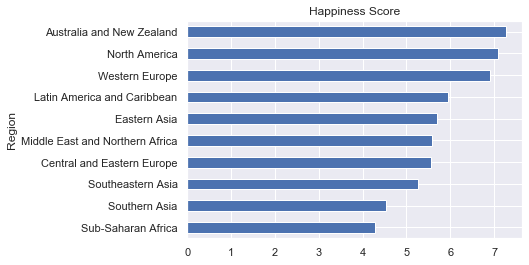

In [12]:
score_by_region('Happiness Score')
graph_by_region('Happiness Score')

                                 Economic Freedom Score
Region                                                 
Australia and New Zealand                     82.650000
North America                                 77.250000
Western Europe                                71.755000
Eastern Asia                                  70.950000
Southeastern Asia                             65.044444
Central and Eastern Europe                    64.493103
Middle East and Northern Africa               61.514286
Latin America and Caribbean                   58.995238
Southern Asia                                 55.771429
Sub-Saharan Africa                            54.782051


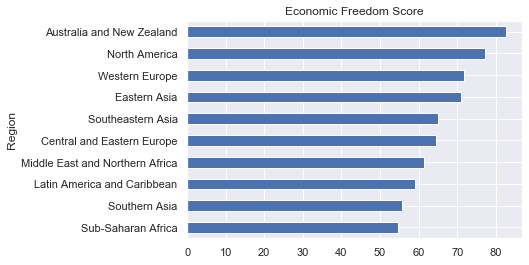

In [13]:
score_by_region('Economic Freedom Score')
graph_by_region('Economic Freedom Score')

In [14]:
world_2019 = gpd.read_file('world2019/wh_ef.shp')

In [17]:
mapf.show_map(world_2019,
        'happiness',
        '2019 Happiness Scores',
        'Happiness Score',
        1,
        2.8,
        8.75)

Loading BokehJS ...

In [20]:
mapf.show_map(world_2019,
        'economic_f',
        '2019 Economic Freedom Scores',
        'Economic Freecom',
        1,
        25,
        100)

Loading BokehJS ...